# PDF data reduction tutorial

## What is the data reduction?

The data reduction is a process in which a two dimensional diffraction image is reduced to a one dimensional x-ray diffraction pattern.

<img src="data/images/diagram.svg" width=1000>

## What software we need for the data reduction?

Only one -- pdfstream. Please read the website to know how to install it: https://xpdacq.github.io/PDFstream/installation.html.

In this tutorial, we will only show an example of its usage. For more details, please visit https://xpdacq.github.io/PDFstream/tutorials0/index.html.

## Before start

Here, I will find all the data files related to the project and put them in an xarray.DataArray. You can uncomment the following block and change the "my_tiff_bases" to build the tiff file array on your computer.

In [1]:
from pathlib import Path


def find_tiff_files(tiff_bases, criterion):
    """Find all the tiff files in folders that satisfies certain criterion.
    
    Parameters
    ----------
    tiff_bases : List[str]
        The folders that holds tiff files.
    
    criterion : Callable
        A function. criterion(tiff_file_path: Path) -> bool.
        
    Yields
    ------
    tiff_file : str
        A path to the tiff file.
    """
    for tiff_base in tiff_bases:
        for tiff_file_path in Path(tiff_base).rglob("*.tiff"):
            if criterion(tiff_file_path):
                yield str(tiff_file_path)

                
def my_criterion(tiff_file_path):
    """My criterion. The file should start with a 'C_'."""
    if tiff_file_path.stem.startswith("C_"):
        return True

In [2]:
import numpy as np
    
my_tiff_bases = [
    "/Volumes/STAO_EXT/data_20201125_0/tiff_base",
    "/Volumes/STAO_EXT/data_20201125_1/tiff_base"
]
    
my_tiff_files = np.array(list(find_tiff_files(my_tiff_bases, my_criterion)))

In [3]:
def get_sample_name(file_path):
    """Get sample name from the file path string."""
    path = Path(file_path)
    name =  path.parent.parent.parent.stem
    if name == "tiff_base":
        name = path.parent.parent.stem
    return name


def get_x_position(file_path):
    """Get x position from the file path string."""
    try:
        return float(Path(file_path).parent.name)
    except ValueError:
        return np.NaN

In [4]:
my_sample_names = np.vectorize(get_sample_name)(my_tiff_files)
my_x_positions = np.vectorize(get_x_position)(my_tiff_files)

In [5]:
import xarray as xr


my_tiff_file_array = xr.DataArray(
    my_tiff_files,
    coords={
        "sample_name": (['dim_0'], my_sample_names),
        "position": (['dim_0'], my_x_positions)
    }
)
my_tiff_file_array = my_tiff_file_array.sortby(["sample_name", "position"])

In [6]:
my_tiff_file_array.to_netcdf("data/xarrays/tiff_array.nc")

## Audit and wash our data

### import modules

In [8]:
import pdfstream.cli as cli
import xarray as xr

### Load the data

In [9]:
tiff_files = xr.load_dataarray("data/xarrays/tiff_array.nc")

In [10]:
tiff_files

<xarray.DataArray (dim_0: 103)>
array(['/Volumes/STAO_EXT/data_20201125_1/tiff_base/C_Ni/dark_sub/C_Ni_20201124-002753_8e1359_0001_dark_corrected_img.tiff',
       '/Volumes/STAO_EXT/data_20201125_0/tiff_base/C_Tatania1/dark_sub/46.8/C_Tatania1_20201125-075418_227fb0_0001_dark_corrected_img.tiff',
       '/Volumes/STAO_EXT/data_20201125_0/tiff_base/C_Tatania1/dark_sub/46.8/C_Tatania1_20201124-212902_ced703_0001_dark_corrected_img.tiff',
       '/Volumes/STAO_EXT/data_20201125_0/tiff_base/C_Tatania1/dark_sub/46.8/C_Tatania1_20201124-143552_552304_0001_dark_corrected_img.tiff',
       '/Volumes/STAO_EXT/data_20201125_1/tiff_base/C_Tatania1/dark_sub/46.8/C_Tatania1_20201125-024146_e5f55c_0001_dark_corrected_img.tiff',
       '/Volumes/STAO_EXT/data_20201125_1/tiff_base/C_Tatania1/dark_sub/46.8/C_Tatania1_20201124-192420_cfa4fe_0001_dark_corrected_img.tiff',
       '/Volumes/STAO_EXT/data_20201125_1/tiff_base/C_Tatania1/dark_sub/46.8/C_Tatania1_20201125-051759_de8c07_0001_dark_corrected_img.tiff',
       '/Volumes/STAO_EXT/data_20201125_1/tiff_base/C_Tatania1/dark_sub/46.8/C_Tatania1_20201124-115936_279116_0001_dark_corrected_img.tiff',
       '/Volumes/STAO_EXT/data_20201125_1/tiff_base/C_Tatania1/dark_sub/46.8/C_Tatania1_20201125-000524_88181d_0001_dark_corrected_img.tiff',
       '/Volumes/STAO_EXT/data_20201125_0/tiff_base/C_Tatania1/dark_sub/48/C_Tatania1_20201124-235222_3d6f13_0001_dark_corrected_img.tiff',
       '/Volumes/STAO_EXT/data_20201125_0/tiff_base/C_Tatania1/dark_sub/48/C_Tatania1_20201125-074118_2f13c4_0001_dark_corrected_img.tiff',
       '/Volumes/STAO_EXT/data_20201125_0/tiff_base/C_Tatania1/dark_sub/48/C_Tatania1_20201125-022844_7f6b1b_0001_dark_corrected_img.tiff',
       '/Volumes/STAO_EXT/data_20201125_0/tiff_base/C_Tatania1/dark_sub/48/C_Tatania1_20201124-114634_33ef92_0001_dark_corrected_img.tiff',
       '/Volumes/STAO_EXT/data_20201125_0/tiff_base/C_Tatania1/dark_sub/48/C_Tatania1_20201124-211602_0280dc_0001_dark_corrected_img.tiff',
       '/Volumes/STAO_EXT/data_20201125_1/tiff_base/C_Tatania1/dark_sub/48/C_Tatania1_20201124-193720_17d888_0001_dark_corrected_img.tiff',
       '/Volumes/STAO_EXT/data_20201125_1/tiff_base/C_Tatania1/dark_sub/48/C_Tatania1_20201124-142252_8cf193_0001_dark_corrected_img.tiff',
       '/Volumes/STAO_EXT/data_20201125_1/tiff_base/C_Tatania1/dark_sub/48/C_Tatania1_20201125-050458_aa480a_0001_dark_corrected_img.tiff',
       '/Volumes/STAO_EXT/data_20201125_1/tiff_base/C_Tatania1/dark_sub/48/C_Tatania1_20201124-165928_1e3e46_0001_dark_corrected_img.tiff',
       '/Volumes/STAO_EXT/data_20201125_0/tiff_base/C_Tatania1/dark_sub/49.5/C_Tatania1_20201124-171230_1b7f40_0001_dark_corrected_img.tiff',
       '/Volumes/STAO_EXT/data_20201125_0/tiff_base/C_Tatania1/dark_sub/49.5/C_Tatania1_20201125-072816_673ad3_0001_dark_corrected_img.tiff',
...
       '/Volumes/STAO_EXT/data_20201125_0/tiff_base/C_Tatania6/dark_sub/15.5/C_Tatania6_20201124-232616_22e4b6_0001_dark_corrected_img.tiff',
       '/Volumes/STAO_EXT/data_20201125_0/tiff_base/C_Tatania6/dark_sub/15.5/C_Tatania6_20201125-043854_5a6191_0001_dark_corrected_img.tiff',
       '/Volumes/STAO_EXT/data_20201125_1/tiff_base/C_Tatania6/dark_sub/15.5/C_Tatania6_20201124-191116_82b156_0001_dark_corrected_img.tiff',
       '/Volumes/STAO_EXT/data_20201125_1/tiff_base/C_Tatania6/dark_sub/15.5/C_Tatania6_20201124-135648_1c2f40_0001_dark_corrected_img.tiff',
       '/Volumes/STAO_EXT/data_20201125_1/tiff_base/C_Tatania6/dark_sub/15.5/C_Tatania6_20201124-163324_cd0079_0001_dark_corrected_img.tiff',
       '/Volumes/STAO_EXT/data_20201125_0/tiff_base/C_Tatania6/dark_sub/16.8/C_Tatania6_20201124-162025_ec0df5_0001_dark_corrected_img.tiff',
       '/Volumes/STAO_EXT/data_20201125_0/tiff_base/C_Tatania6/dark_sub/16.8/C_Tatania6_20201125-070210_86f968_0001_dark_corrected_img.tiff',
       '/Volumes/STAO_EXT/data_20201125_0/tiff_base/C_Tatania6/dark_sub/16.8/C_Tatania6_20201124-134348_8f02d3_0001_dark_corrected_img.tiff',
       '/Volumes/STAO_E

### Wash the data

Let's fill in the Nan with 0. for easier processing in the future.

In [11]:
# fill the unknown position with 0.
tiff_files = tiff_files.assign_coords(position=tiff_files.position.fillna(0.))

We have a problematic file.

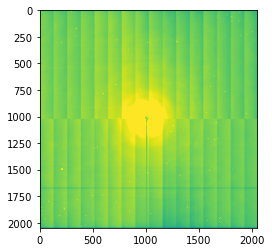

In [13]:
import matplotlib.pyplot as plt
import pdfstream.io as io


# There is a problematic file.
problematic_file = tiff_files.where(
    tiff_files.str.contains("badcfc"),
    drop=True
)

problematic_img = io.load_img(problematic_file.item())
plt.imshow(problematic_img, vmax=problematic_img.mean() + 2. * problematic_img.std(), vmin=0)
plt.show()

In [14]:
# drop this problematic data
tiff_files = tiff_files.where(
    ~tiff_files.str.contains("badcfc"),
    drop=True
)

Save the result in the file

In [15]:
tiff_files.to_netcdf("data/xarrays/tiff_array.nc")

## How to run the calibration using pyFAI-calib2?

We use the pyFAI-calib2 to do the calibration. It is a command line tool with the syntax below:

``pyFAI-calib2 -c <d-spacing file> -w <wavelength in angstrom> -D <detector name or a spline file> -i <output poni file> <calibrant tiff file>``

The d-space file in our case is here: "data/calibration/Ni_dspacing.txt"

The wavelength in our case is: 0.1665

The detector is: "perkin_elmer"

In [16]:
tiff_files = xr.load_dataarray("data/xarrays/tiff_array.nc")

In [17]:
wavelength = '0.1675'
dspacing_file = "data/calibration/Ni_dspacing.txt"
detector = "perkin_elmer"

Here is our calibrant scattering image.

In [18]:
# Ni calibrant tiff file
calibrant_image = tiff_files.where(tiff_files.sample_name == "C_Ni", drop=True).item()
calibrant_image

'/Volumes/STAO_EXT/data_20201125_1/tiff_base/C_Ni/dark_sub/C_Ni_20201124-002753_8e1359_0001_dark_corrected_img.tiff'

Here, I define a variable that is the place where I would like to save the poni file.

In [19]:
poni_file = "data/calibration/1675.poni"

Let's start the calibration. Here, I run the command using subprocess.

In [20]:
# the command defined in a list of args
cmd = ['pyFAI-calib2', '-c', dspacing_file, '-w', wavelength, '-D', detector, '-i', poni_file, calibrant_image]

You can also run the command in the terminal. The command is shown in the output of the cell below.

In [21]:
print(' '.join(cmd))

pyFAI-calib2 -c data/calibration/Ni_dspacing.txt -w 0.1675 -D perkin_elmer -i data/calibration/1675.poni /Volumes/STAO_EXT/data_20201125_1/tiff_base/C_Ni/dark_sub/C_Ni_20201124-002753_8e1359_0001_dark_corrected_img.tiff


Add the calibration data into attribute.

In [22]:
tiff_files = tiff_files.assign_attrs(
    {"poni_file": poni_file}
)
tiff_files.to_netcdf("data/xarrays/tiff_array.nc")

## A test for the validity of the calibration (skipped)

A test for the calibration result. The quality of calibration is evaluated by the goodness of the fit of the PDF of.

## How to average the images using PDFstream?

First, we average one diffraction of the sample for an example.

Then, we average the images from the substrate and we will use the result as the background scattering.

Now, let's get the average image for all the spots on all the samples.

In [26]:
from pathlib import Path


def grouped_data(data):
    """Group the data array according to sample name and position."""
    for sample_name, group0 in data.groupby("sample_name"):
        for position, group1 in group0.groupby("position"):
            yield sample_name, position, group1
        

def average_files_in_group(data):
    """Group the data, average the tiff files in each group and save the outputs in an xarray."""
    ss, ps, pps = [], [], []
    for s, p, g in grouped_data(data):
        path = Path("data/tiff/{}-{}-average.tiff".format(s, p))
        cli.average(str(path), *g.values)
        ss.append(s)
        ps.append(p)
        pps.append(str(path))
    
    return xr.DataArray(
        pps,
        coords={
            "sample_name": (["dim_0"], ss),
            "position": (["dim_0"], ps)
        },
        attrs=data.attrs
    )

In [27]:
# a test
# average_files_in_group(tiff_files[0:1])

In [28]:
# average all tiff files except those for Ni
result = average_files_in_group(tiff_files[1:])
result.to_netcdf("data/xarrays/averaged_tiff_files.nc")

## How to integrate the diffraction image using PDFstream?

This is the function to integrate the diffraction image.

In [60]:
cli.integrate?

Signature:
cli.integrate(
    poni_file: str,
    *img_files: str,
    bg_img_file: str = None,
    mask_file: str = None,
    output_dir: str = '.',
    bg_scale: float = None,
    mask_setting: Union[dict, str] = None,
    integ_setting: dict = None,
    plot_setting: Union[dict, str] = None,
    img_setting: Union[dict, str] = None,
    parallel: bool = False,
    test: bool = False,
) -> List[str]
Docstring:
Conduct azimuthal integration on the two dimensional diffraction images.

The image will be first subtracted by background if background image file is given. Then, it will be binned
in azimuthal direction according to the geometry provided by the poni file. The pixels far away from the
average in each bin will be masked. The mask will be applied on the background subtracted image and the
image will be integrated again by the pyFAI. The polarization correction and pixel-splitting algorithm will
be applied according to user settings before the integration. The results are saved a

### Let's do it!

Let's use it for our data. We can integrate arbitrary number of tiff files at the same time. All the tiff files are measured in the same geometry specified in the poni file.

In [29]:
# load data
avg_tiff_files = xr.load_dataarray("data/xarrays/averaged_tiff_files.nc")
avg_tiff_files

<xarray.DataArray (dim_0: 14)>
array(['data/tiff/C_Tatania1-46.8-average.tiff',
       'data/tiff/C_Tatania1-48.0-average.tiff',
       'data/tiff/C_Tatania1-49.5-average.tiff',
       'data/tiff/C_Tatania2-38.5-average.tiff',
       'data/tiff/C_Tatania2-40.0-average.tiff',
       'data/tiff/C_Tatania2-41.5-average.tiff',
       'data/tiff/C_Tatania3-0.0-average.tiff',
       'data/tiff/C_Tatania4-0.0-average.tiff',
       'data/tiff/C_Tatania5-26.6-average.tiff',
       'data/tiff/C_Tatania5-27.5-average.tiff',
       'data/tiff/C_Tatania5-29.0-average.tiff',
       'data/tiff/C_Tatania6-15.5-average.tiff',
       'data/tiff/C_Tatania6-16.8-average.tiff',
       'data/tiff/C_Tatania6-18.5-average.tiff'], dtype=object)
Coordinates:
    sample_name  (dim_0) object 'C_Tatania1' 'C_Tatania1' ... 'C_Tatania6'
    position     (dim_0) float64 46.8 48.0 49.5 38.5 ... 29.0 15.5 16.8 18.5
Dimensions without coordinates: dim_0
Attributes:
    poni_file:  data/calibration/1675.poni

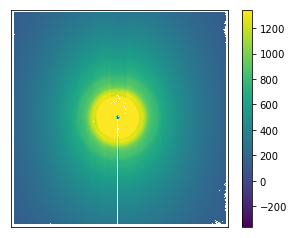

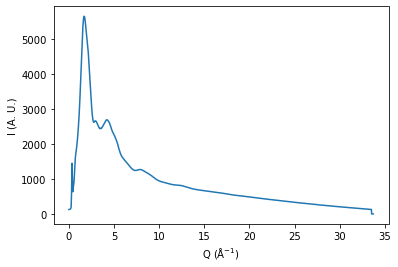

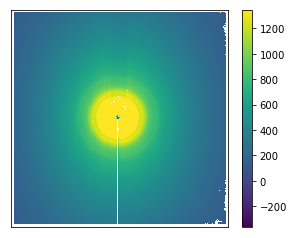

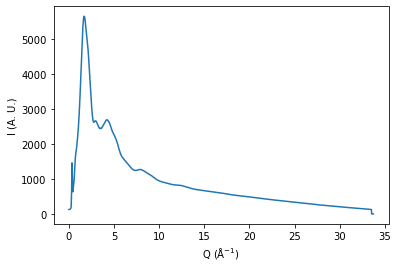

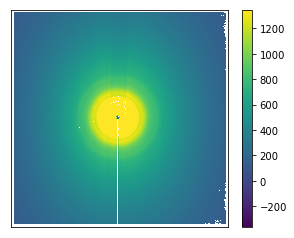

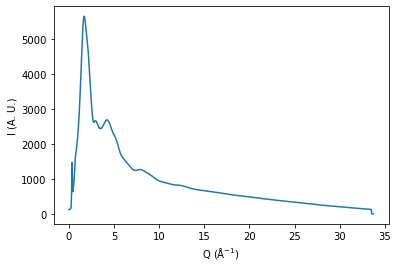

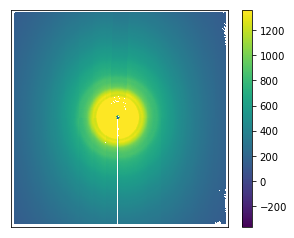

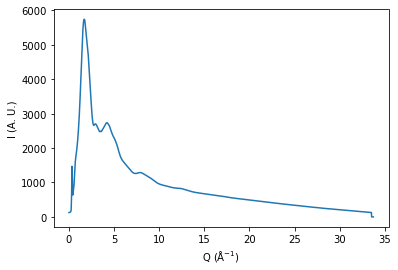

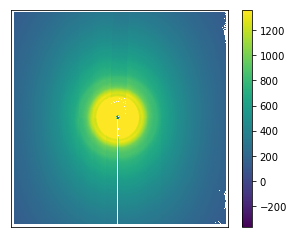

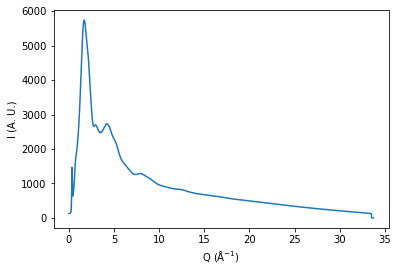

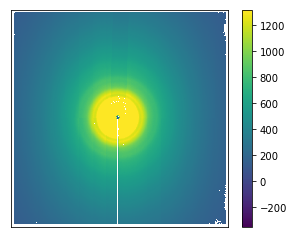

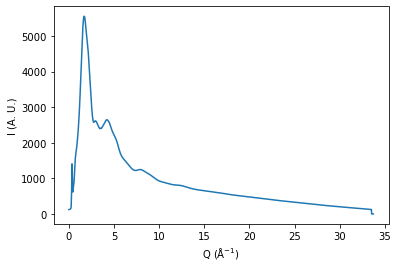

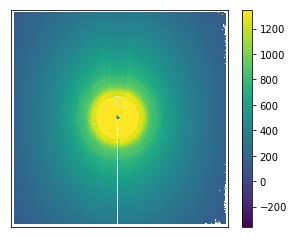

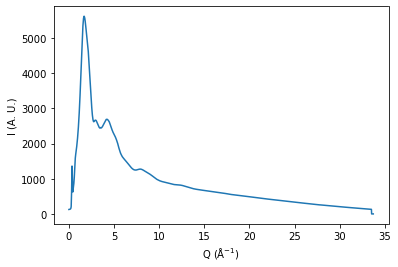

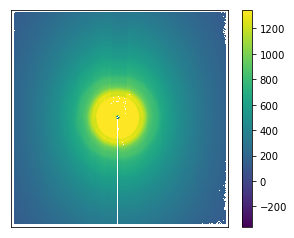

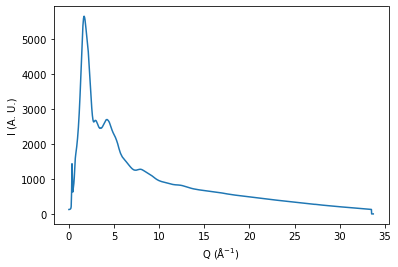

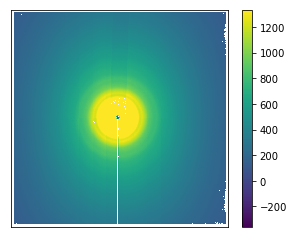

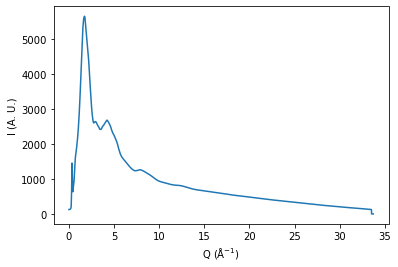

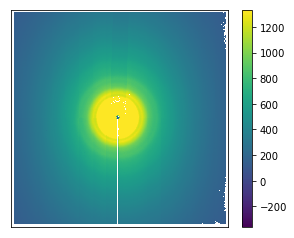

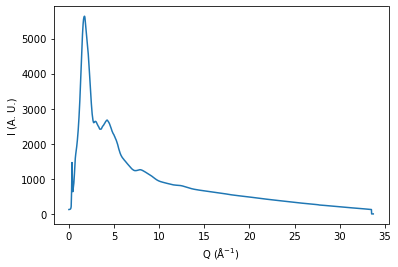

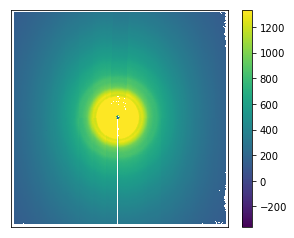

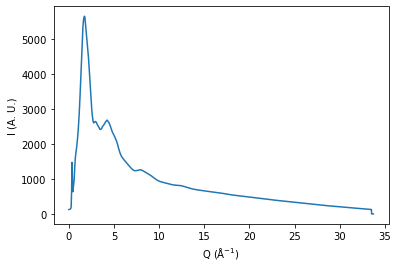

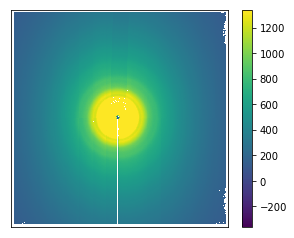

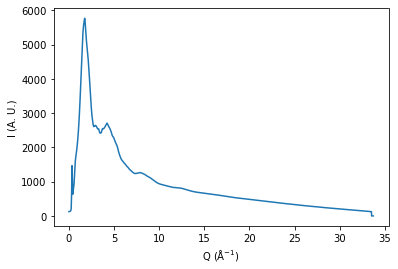

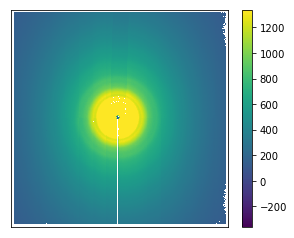

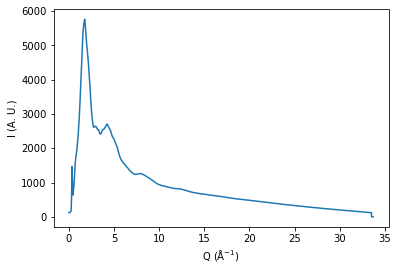

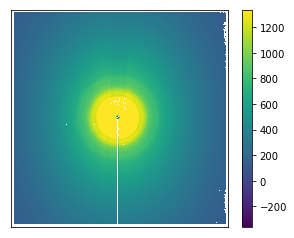

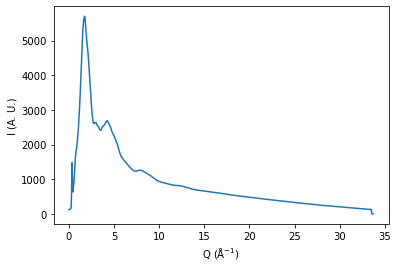

In [30]:
import pdfstream.cli as cli


def integrate_tiff_files(data: xr.DataArray, output_dir: str):
    """Integrate all the tiff files in an xarray."""
    chi_paths = cli.integrate(
        data.attrs["poni_file"],
        *data.values,
        output_dir=output_dir
    )
    return xr.DataArray(
        list(map(str, chi_paths)),
        coords=data.coords,
        attrs=data.attrs
    )


chi0 = integrate_tiff_files(avg_tiff_files, "data/chi_bkgsub_false/")
chi0.to_netcdf("data/xarrays/chi_bgksub_false.nc")

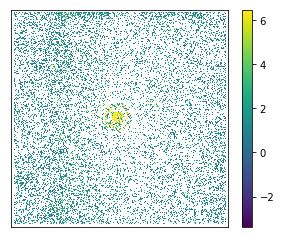

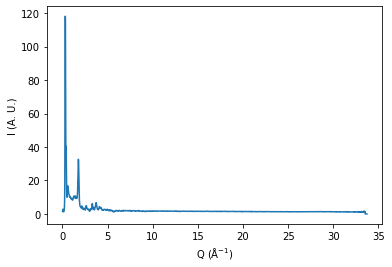

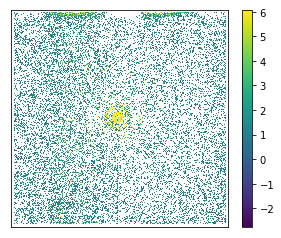

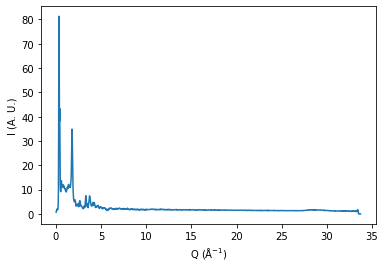

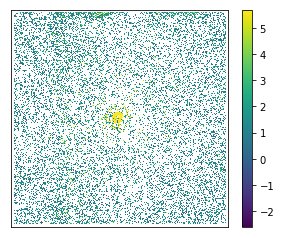

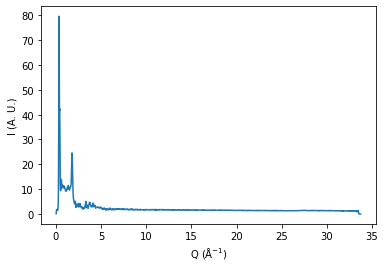

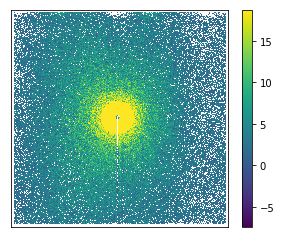

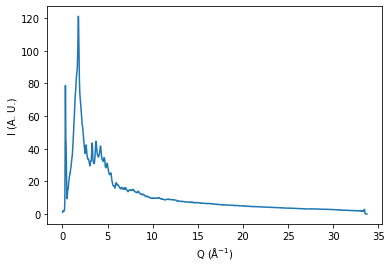

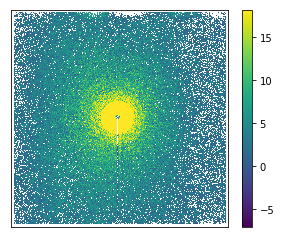

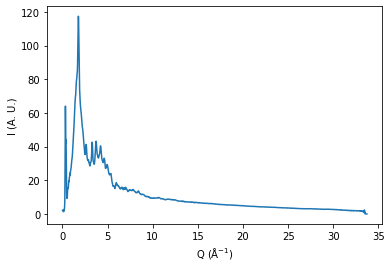

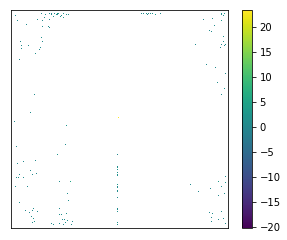

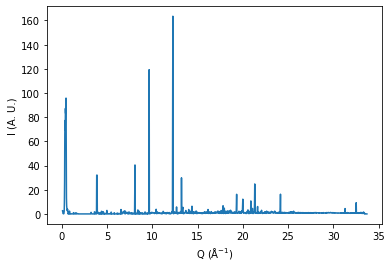

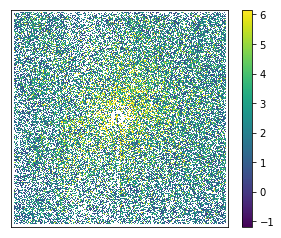

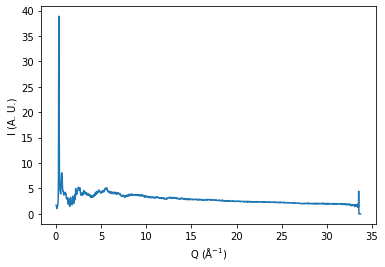

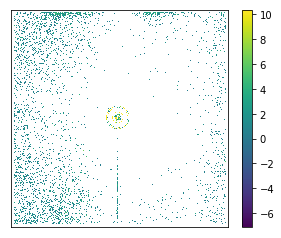

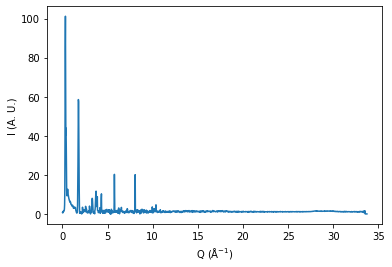

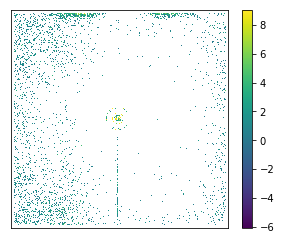

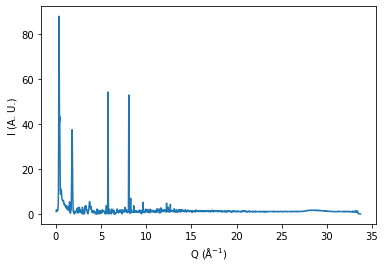

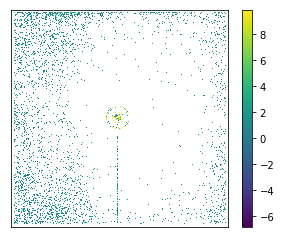

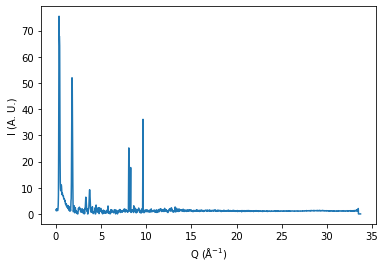

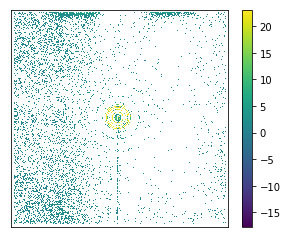

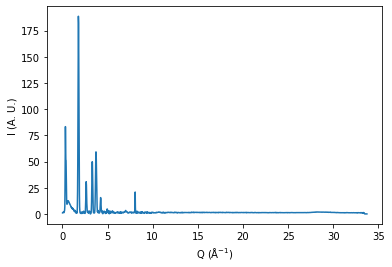

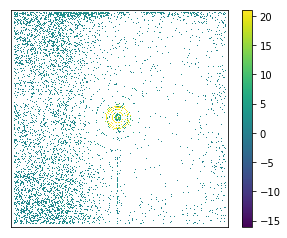

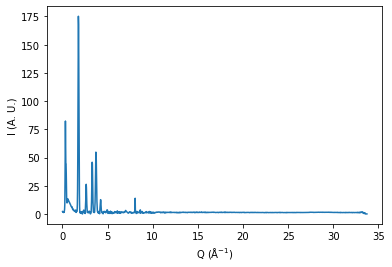

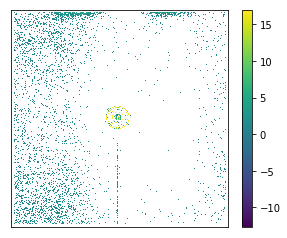

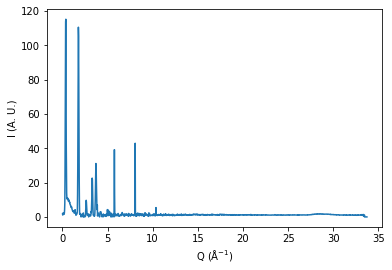

In [31]:
def integrate_tiff_files_with_background_subtraction(data: xr.DataArray, output_dir: str):
    """Integrate all the tiff files in an xarray and subtract the background before the integration."""
    is_bkg = (data.sample_name == "C_Tatania4")
    bkg = data.where(is_bkg, drop=True)
    not_bkg = data.where(~is_bkg, drop=True)
    chi_paths = cli.integrate(
        data.attrs["poni_file"],
        *not_bkg.values,
        bg_img_file=bkg.item(),
        output_dir=output_dir,
        mask_setting={"alpha": 3.0}
    )
    return xr.DataArray(
        list(map(str, chi_paths)),
        coords=not_bkg.coords,
        attrs=not_bkg.attrs
    )

chi1 = integrate_tiff_files_with_background_subtraction(avg_tiff_files, "data/chi_bkgsub_true/")
chi1.to_netcdf("data/xarrays/chi_bkgsub_true.nc")